<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/market_risk_01_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# year=2022
url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2022"
data= pd.read_html(url)[0]
data
# df = pd.read_csv(df, parse_dates=["date"]).set_index("date")

,Date,20 YR,30 YR,Extrapolation Factor,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.1,52 WEEKS BANK DISCOUNT,COUPON EQUIVALENT.2,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/03/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,01/04/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,01/05/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,01/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,01/07/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,12/19/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.57,4.71,4.64,4.25,3.99,3.70,3.67,3.57,3.82,3.62
241,12/20/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.55,4.70,4.64,4.25,4.03,3.79,3.78,3.69,3.94,3.74
242,12/21/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.57,4.67,4.60,4.21,4.00,3.78,3.77,3.68,3.93,3.74
243,12/22/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.57,4.66,4.64,4.24,4.02,3.79,3.77,3.67,3.91,3.73


In [83]:
# data[['Date', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr','7 Yr', '10 Yr', '20 Yr', '30 Yr']]
df=data[['Date', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr','7 Yr', '10 Yr', '20 Yr', '30 Yr']].set_index('Date')
df

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/03/2022,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
01/04/2022,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
01/05/2022,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
01/06/2022,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
01/07/2022,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...
12/19/2022,4.71,4.64,4.25,3.99,3.70,3.67,3.57,3.82,3.62
12/20/2022,4.70,4.64,4.25,4.03,3.79,3.78,3.69,3.94,3.74
12/21/2022,4.67,4.60,4.21,4.00,3.78,3.77,3.68,3.93,3.74


In [84]:
effective_returns=df.pct_change(1).round(2)[1:]
effective_returns

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.00,-0.05,-0.01,-0.02,0.00,0.01,0.02,0.02,0.03
01/05/2022,0.00,0.08,0.08,0.08,0.04,0.03,0.03,0.01,0.01
01/06/2022,0.05,0.10,0.06,0.05,0.03,0.02,0.01,0.00,0.00
01/07/2022,0.04,-0.04,-0.01,0.02,0.02,0.02,0.02,0.01,0.01
01/10/2022,0.17,0.07,0.06,0.03,0.02,0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...
12/19/2022,0.01,0.01,0.02,0.02,0.02,0.03,0.03,0.02,0.03
12/20/2022,-0.00,0.00,0.00,0.01,0.02,0.03,0.03,0.03,0.03
12/21/2022,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00


In [85]:
log_returns=np.log(df/df.shift(1)).round(2)[1:]
log_returns

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.00,-0.05,-0.01,-0.02,0.00,0.01,0.02,0.02,0.03
01/05/2022,0.00,0.08,0.08,0.08,0.04,0.03,0.03,0.01,0.01
01/06/2022,0.04,0.09,0.06,0.04,0.03,0.02,0.01,0.00,0.00
01/07/2022,0.04,-0.05,-0.01,0.02,0.02,0.02,0.02,0.01,0.01
01/10/2022,0.15,0.07,0.06,0.03,0.02,0.01,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...
12/19/2022,0.01,0.01,0.02,0.02,0.02,0.02,0.03,0.02,0.03
12/20/2022,-0.00,0.00,0.00,0.01,0.02,0.03,0.03,0.03,0.03
12/21/2022,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,0.00


In [86]:
features= log_returns
x=features
x2=x

In [87]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

x=MinMaxScaler().fit_transform(x)
x_df=pd.DataFrame(x,index=features.index)
x_df

,0,1,2,3,4,5,6,7,8
Date,,,,,,,,,
01/04/2022,0.350,0.176471,0.307692,0.347826,0.45,0.529412,0.588235,0.666667,0.714286
01/05/2022,0.350,0.558824,0.653846,0.782609,0.65,0.647059,0.647059,0.583333,0.571429
01/06/2022,0.450,0.588235,0.576923,0.608696,0.60,0.588235,0.529412,0.500000,0.500000
01/07/2022,0.450,0.176471,0.307692,0.521739,0.55,0.588235,0.588235,0.583333,0.571429
01/10/2022,0.725,0.529412,0.576923,0.565217,0.55,0.529412,0.529412,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...
12/19/2022,0.375,0.352941,0.423077,0.521739,0.55,0.588235,0.647059,0.666667,0.714286
12/20/2022,0.350,0.323529,0.346154,0.478261,0.55,0.647059,0.647059,0.750000,0.714286
12/21/2022,0.325,0.294118,0.307692,0.391304,0.45,0.470588,0.470588,0.500000,0.500000


In [88]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_df)

principal_df=pd.DataFrame(pca.fit_transform(x_df),
                          columns=log_returns.columns,
                          index=x_df.index)
principal_df

,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,
01/04/2022,0.075803,-0.315427,0.048035,0.062401,-0.022260,-0.058221,-0.057288,-0.014341,0.010970
01/05/2022,0.457293,0.229999,-0.163216,-0.132710,-0.041270,-0.011671,0.003172,0.071401,-0.010268
01/06/2022,0.252454,0.277452,-0.028792,-0.093936,0.024644,0.006872,0.001550,-0.029312,0.005765
01/07/2022,0.127400,-0.112478,-0.020665,0.203027,-0.047095,-0.020333,0.026468,0.038172,-0.018827
01/10/2022,0.224150,0.334590,0.207230,0.046731,-0.038520,-0.023098,-0.044249,-0.013857,-0.006563
...,...,...,...,...,...,...,...,...,...
12/19/2022,0.289802,-0.130345,0.003074,-0.017036,-0.003907,-0.052235,-0.018097,0.019840,-0.017087
12/20/2022,0.302625,-0.234005,0.005513,0.016726,0.023611,0.017253,0.009086,-0.000807,0.012839
12/21/2022,-0.101243,-0.072811,-0.030012,0.022746,0.021858,0.007814,-0.003277,-0.017828,-0.004691


In [89]:
principal_df.shape
results=pd.DataFrame([pca.explained_variance_,
              pca.explained_variance_ratio_,
              np.cumsum(pca.explained_variance_ratio_)],columns=principal_df.columns,
             index=['explained_variance','explained_variance_ratio_','cumulative sum_explained_variance_ratio_'])

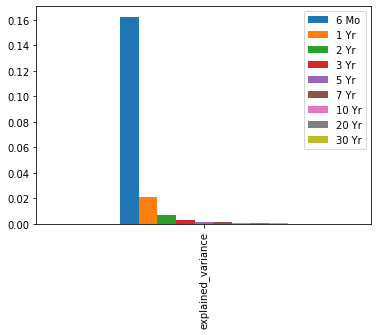

In [90]:
results.loc[['explained_variance',]].plot.bar(legend=True,)

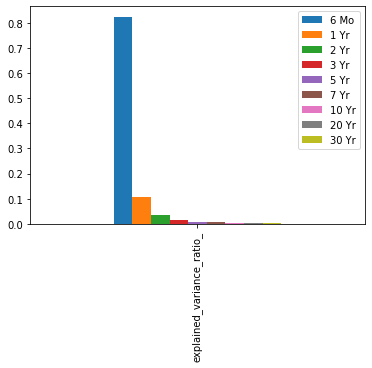

In [91]:
results.loc[['explained_variance_ratio_',]].plot.bar(legend=True,)

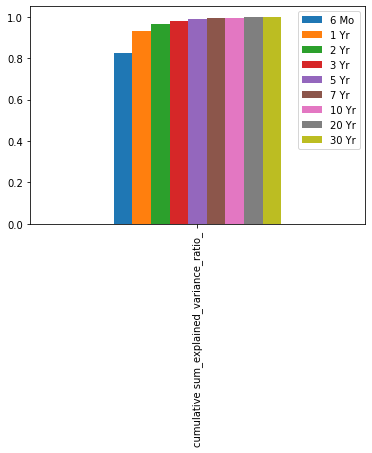

In [92]:
results.loc[['cumulative sum_explained_variance_ratio_',]].plot.bar(legend=True,)